# Classification - Fifa Dataset
## Name - Shiva Nagendra Babu 
## ID- 0903676

In [1]:
# Importing the Important Libraries for classification
# Data visualization
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Tensorflow & Keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout

# Train-Test
from sklearn.model_selection import train_test_split

# Scaling data
from sklearn.preprocessing import StandardScaler

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix


## Read the Dataset

In [2]:
fifa = pd.read_csv("fifa.csv")
fifa.head()

C:\Users\shiva\AppData\Local\Temp\ipykernel_15988\766921812.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv("fifa.csv")


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


## Data Cleaning

In [3]:
#Checking the Null Values
fifa.isnull().sum()

ID             0
Name           0
Age            0
OVA            0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

## Filter nulls - Data Transformation

In [4]:
na = pd.notnull(fifa["BP"])
fifa = fifa[na]

### Filter numerical features/columns and "BP" as target

In [5]:
fifa = fifa[["BP", 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes']]

In [6]:
fifa.fillna(0, inplace=True)

In [7]:
fifa["BP"].unique()

array(['LWB', 'CM', 'CAM', 'ST', 'RW', 'CB', 'CF', 'GK', 'CDM', 'RWB',
       'LB', 'LM', 'RM', 'RB', 'LW'], dtype=object)

### categorizing the positions into  positions in FIFA

In [8]:
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

fifa.loc[fifa["BP"] == "GK", "BP"] = 0

fifa.loc[fifa["BP"].isin(defender_player), "BP"] = 1

fifa.loc[fifa["BP"].isin(midfielder_player), "BP"] = 2

fifa.loc[fifa["BP"].isin(forward_player), "BP"] = 3

In [9]:
fifa["BP"].unique()

array([1, 2, 3, 0], dtype=object)

In [10]:
x = fifa.drop("BP", axis = 1).values

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

y = fifa["BP"]
y_cat = to_categorical(y)

###  Split the data into test and train in 30-70% ratio

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.3)

## Build classification model

In [12]:
input_layer = Input(shape=(33,))
dense_layer_1 = Dense(60, input_shape = (33,), activation = "relu")(input_layer)
dense_layer_2 = Dense(15, activation = "relu")(dense_layer_1)
dropout_layer = Dropout(0.2)(dense_layer_2)
output_layer = Dense(4, activation = "softmax")(dropout_layer)

model = Model(input_layer, output_layer)
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 33)]              0         
                                                                 
 dense (Dense)               (None, 60)                2040      
                                                                 
 dense_1 (Dense)             (None, 15)                915       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
Total params: 3,019
Trainable params: 3,019
Non-trainable params: 0
_________________________________________________________________


C:\Users\shiva\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Train the model

In [13]:
model.fit(x_train, y_train, batch_size=64, verbose=1, epochs=100, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/100
188/188 [==============================] - 2s 5ms/step - loss: 0.3181 - accuracy: 0.8752 - val_loss: 0.2262 - val_accuracy: 0.9068
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9052 - val_loss: 0.2060 - val_accuracy: 0.9105
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9097 - val_loss: 0.2081 - val_accuracy: 0.9155
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.2067 - accuracy: 0.9134 - val_loss: 0.2062 - val_accuracy: 0.9130
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.2040 - accuracy: 0.9196 - val_loss: 0.2392 - val_accuracy: 0.9052
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 0.2034 - accuracy: 0.9147 - val_loss: 0.2033 - val_accuracy: 0.9157
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1992 - accuracy: 0.9201 - val_loss: 0.2040 - val_accuracy: 0.9124

Epoch 58/100
188/188 [==============================] - 1s 3ms/step - loss: 0.1452 - accuracy: 0.9397 - val_loss: 0.2426 - val_accuracy: 0.9151
Epoch 59/100
188/188 [==============================] - 1s 3ms/step - loss: 0.1421 - accuracy: 0.9389 - val_loss: 0.2588 - val_accuracy: 0.9099
Epoch 60/100
188/188 [==============================] - 1s 3ms/step - loss: 0.1393 - accuracy: 0.9430 - val_loss: 0.2554 - val_accuracy: 0.9134
Epoch 61/100
188/188 [==============================] - 1s 3ms/step - loss: 0.1382 - accuracy: 0.9444 - val_loss: 0.2589 - val_accuracy: 0.9134
Epoch 62/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1338 - accuracy: 0.9433 - val_loss: 0.2623 - val_accuracy: 0.9091
Epoch 63/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1300 - accuracy: 0.9449 - val_loss: 0.2539 - val_accuracy: 0.9126
Epoch 64/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1358 - accuracy: 0.9462 - val_loss: 0.2851 - val_accuracy:

### Test the model

In [14]:
model.predict(x[0:1])

1/1 [==============================] - 0s 99ms/step


array([[4.7962355e-15, 9.0745407e-01, 9.2545882e-02, 5.4188298e-09]],
      dtype=float32)

## Confusion Matrix

In [15]:
# Predict y data with model: 
y_pred = model.predict(x_test)

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm

161/161 [==============================] - 0s 2ms/step


array([[ 447,    0,    0,    0],
       [   0, 1560,   96,    3],
       [   0,  104, 1820,   97],
       [   0,    5,  151,  855]], dtype=int64)

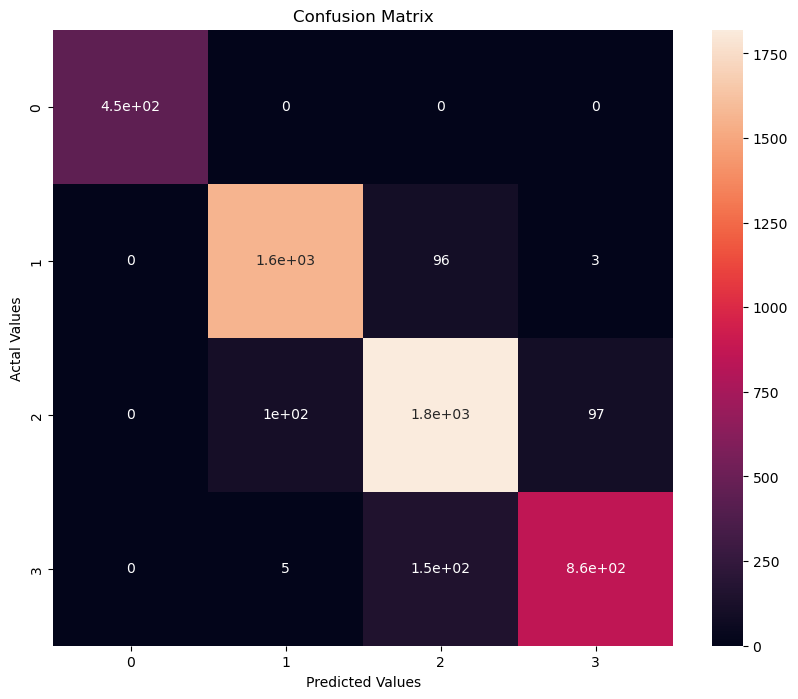

In [16]:
#Plotting the confusion matrix

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Model Evaluation

In [17]:
report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       0.93      0.94      0.94      1659
           2       0.88      0.90      0.89      2021
           3       0.90      0.85      0.87      1011

    accuracy                           0.91      5138
   macro avg       0.93      0.92      0.92      5138
weighted avg       0.91      0.91      0.91      5138



In [18]:
modelAccuracy = model.evaluate(x_test, y_test)[1]
print("Model accuracy: ", modelAccuracy*100, "%")

161/161 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.9112
Model accuracy:  91.12495183944702 %


### With the above model we have acheived 91.1% of accuracy that the classification of the feature is derived